In [1]:
# !pip install bs4

In [2]:
#!pip install wordcloud

In [3]:
# !pip install --user pyLDAvis

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_colwidth', None) #prevent truncated view of dataframe

In [50]:
pd.set_option('display.max_rows', None) #show all rows

In [6]:
sdf = pd.read_csv("software_job_postings_results.csv")
ddf = pd.read_csv("data_job_postings_results.csv")
cdf = pd.read_csv("computer_job_postings_results.csv")

In [7]:
df = pd.concat([sdf,ddf,cdf],ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2635 non-null   int64  
 1   keyword                            2635 non-null   object 
 2   link                               2635 non-null   object 
 3   job_id                             2635 non-null   int64  
 4   job_title                          2635 non-null   object 
 5   job_expired                        2635 non-null   bool   
 6   job_confidential                   2635 non-null   bool   
 7   job_salary_min                     998 non-null    float64
 8   job_salary_max                     998 non-null    float64
 9   job_salary_currency                2552 non-null   object 
 10  company                            2609 non-null   object 
 11  job_post_date                      2635 non-null   objec

In [9]:
df.head()

,Unnamed: 0,keyword,link,job_id,job_title,job_expired,job_confidential,job_salary_min,job_salary_max,job_salary_currency,...,job_requirement_yearsOfExperience,job_requirement_qualification,job_requirement_skill,job_employment_type,job_languages,job_benefits,job_apply_url,job_location_zipcode,job_location,job_country
0,0,software,/en/job/software-developer-9354937,9354937,Software Developer,False,False,2800.0,3500.0,SGD,...,2 years,"Bachelor's Degree, Post Graduate Diploma, Professional Degree",NaN,Full-Time,NaN,"['Dental', 'Medical', 'Regular hours, Mondays - Fridays', 'Business (e.g. Shirts)']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9354937&advertisement_id=9353308&s=20&AdvertisementSource=1,701404,Paya Lebar,sg
1,1,software,/en/job/software-engineer-9407446,9407446,Software Engineer,False,False,4000.0,6500.0,SGD,...,2 years,Not Specified,NaN,Full-Time,NaN,"['Dental', 'Education support', 'Miscellaneous allowance', 'Medical', 'Sports (e.g. Gym)', 'Parking', 'Vision', 'Regular hours, Mondays - Fridays', 'Business (e.g. Shirts)']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9407446&advertisement_id=9405817&s=20&AdvertisementSource=1,701507,Jurong West,sg
2,2,software,/en/job/software-qa-engineer-9409290,9409290,Software QA Engineer,False,False,4200.0,5880.0,SGD,...,2 years,"Bachelor's Degree, Post Graduate Diploma, Professional Degree, Master's Degree, Doctorate (PhD)",NaN,Full-Time,NaN,"['Education support', 'Miscellaneous allowance', 'Medical', 'Parking', 'Regular hours, Mondays - Fridays', 'Casual (e.g. T-shirts)', 'Employee Share Option Plan (ESOP), Flexible Benefits']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9409290&advertisement_id=9407661&s=20&AdvertisementSource=1,701506,Jurong East,sg
3,3,software,/en/job/senior-software-developer-9408408,9408408,Senior Software Developer,False,False,NaN,NaN,SGD,...,5 years,"Bachelor's Degree, Post Graduate Diploma, Professional Degree",NaN,Full-Time,NaN,"['Dental', 'Medical', 'Regular hours, Mondays - Fridays', 'Business (e.g. Shirts)']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9408408&advertisement_id=9406779&s=20&AdvertisementSource=1,701499,East - Others,sg
4,4,software,/en/job/software-programmer-work-from-home-9310317,9310317,Software Programmer (Work From Home),False,False,6000.0,9000.0,SGD,...,5 years,"Diploma, Advanced/Higher/Graduate Diploma, Bachelor's Degree, Post Graduate Diploma, Professional Degree, Master's Degree",NaN,Full-Time,NaN,"['Education support', 'Medical', 'Equity share in software company. Eligible for benefits from VC investment']",https://myjobstreet.jobstreet.com.sg/application/online-apply.php?job_id=9310317&advertisement_id=9308688&s=20&AdvertisementSource=1,701703,Bukit Timah,sg


In [10]:
df = df.drop_duplicates(['job_id'])

In [11]:
df = df.drop_duplicates(['job_title','job_description','job_benefits'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 0 to 2634
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2543 non-null   int64  
 1   keyword                            2543 non-null   object 
 2   link                               2543 non-null   object 
 3   job_id                             2543 non-null   int64  
 4   job_title                          2543 non-null   object 
 5   job_expired                        2543 non-null   bool   
 6   job_confidential                   2543 non-null   bool   
 7   job_salary_min                     967 non-null    float64
 8   job_salary_max                     967 non-null    float64
 9   job_salary_currency                2464 non-null   object 
 10  company                            2518 non-null   object 
 11  job_post_date                      2543 non-null   objec

In [13]:
import re

def clean_job_title(job_title):
    job_title = re.sub("[\(\[].*?[\)\]]", "", job_title) #remove everything within the bracket
    job_title = re.sub(r'[^\w]', ' ', job_title) #remove that's not alphanumeric or underscore
    job_title = re.sub(r'\w*\d\w*', '', job_title) #remove words with number
    job_title = job_title.strip() #remove trailing and ending whitespace
    job_title = re.sub("\s\s+", " ", job_title) #remove multiple whitespace
    job_title = job_title.title() #proper casing
    return job_title

In [14]:
df["clean_job_title"] = df["job_title"].apply(clean_job_title)

In [15]:
jdf = pd.DataFrame(df["clean_job_title"].value_counts())

In [16]:
#remove runtime error on Glyph fonts
plt.rcParams['font.sans-serif'] = ['simhei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

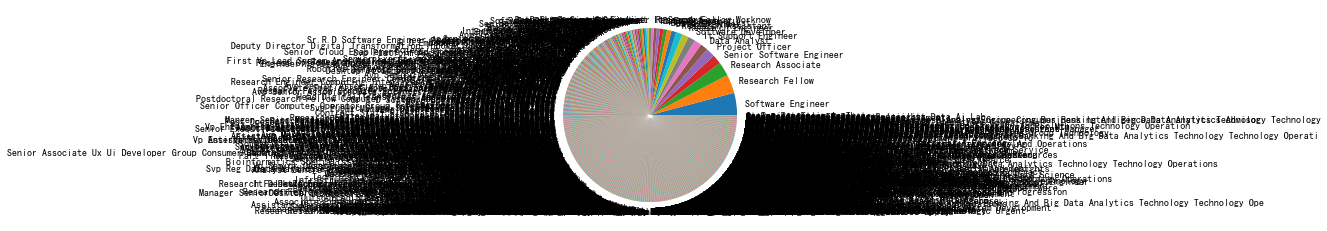

In [17]:
df.clean_job_title.value_counts().plot(kind="pie")

In [18]:
jdf[jdf["clean_job_title"] > 1]

,clean_job_title
Software Engineer,105
Research Fellow,88
Research Associate,66
Senior Software Engineer,45
Project Officer,42
...,...
Software Architect,2
Research Fellow Computer Engineering Computer Science,2
C Net Software Developer,2
Senior Software Test Analyst,2


# To-do: Match job title to common ones, to reduce the number of nodes in the network map using clustering

## Using pre-trained GloVe

In [19]:
from nltk.tokenize import word_tokenize

def tokeniseWord(word):
    return word_tokenize(word.lower())

In [20]:
df["job_title_token"] = df["clean_job_title"].apply(tokeniseWord)

In [21]:
embeddings_index = {};
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

In [22]:
def convertWord2Embedding(tokens):
    try:
        vec = np.copy(embeddings_index[tokens[0]])
        for i in range(1,len(tokens)):
            vec += np.copy(embeddings_index[tokens[i]])
        return list(vec)
    except Exception as e:
        #words don't exist in embeddings
        return "error"

In [23]:
df["word_embedding"] = df["job_title_token"].apply(convertWord2Embedding)

In [24]:
#drop error embeddings
df = df.drop(df.loc[df['word_embedding']=="error"].index)

In [25]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=1, init="k-means++", random_state = 42)
kmeans.fit(list(df["word_embedding"]))

KMeans(n_clusters=1, random_state=42)

In [44]:
from sklearn import cluster
from sklearn import metrics

wcss = []
for i in range(1, 50, 5): 
    kmeans = cluster.KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(list(df["word_embedding"]))
    wcss.append(kmeans.inertia_)


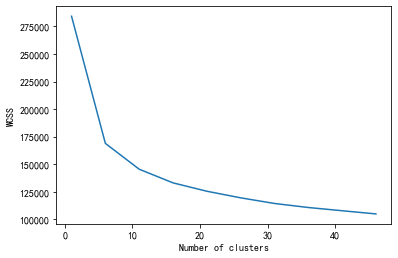

In [45]:
plt.plot(range(1, 50, 5), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [28]:
kmeans = cluster.KMeans(n_clusters=4, random_state = 42)
kmeans.fit(list(df["word_embedding"]))

labels = kmeans.labels_
df['elabels'] = labels

In [30]:
for label in df.elabels.unique():
    print("Labels:",label)
    print(df[df['elabels']==label].clean_job_title.value_counts()[:10])
    print("#"*20)

Labels: 2
Software Engineer                105
Senior Software Engineer          45
Software Developer                34
Desktop Support Engineer          11
Principal Software Engineer        9
Senior Software Developer          9
Data Processing Specialist         9
Software Development Engineer      8
Application Developer              7
Software Tester                    7
Name: clean_job_title, dtype: int64
####################
Labels: 1
Senior Cloud Enablement Group Consumer Banking And Big Data                3
Data Remediation Project Manager Data Analyst                              2
Engineering Lead Group Consumer Banking And Big Data Analytics             2
Avp Senior Associate Data Scientist Technology And Operations              2
Research Fellow Computer Engineering Computer Science Urgent               2
Senior Officer Computer Operator Group Infrastructure Platform Services    2
First Vp Lead System Analyst Real Time Data Services Group Technology      2
Desktop It Sup

In [54]:
df[df['elabels']==0]['clean_job_title'].value_counts()

Research Fellow                                      88
Research Associate                                   66
Project Officer                                      42
Data Analyst                                         36
Research Engineer                                    31
Research Assistant                                   30
Data Engineer                                        23
Business Analyst                                     21
It Engineer                                          17
Data Scientist                                       16
It Executive                                         15
It Support                                           12
Research Scientist                                   10
Senior Research Engineer                              8
It Administrator                                      7
It Officer                                            6
Senior Data Analyst                                   6
It Specialist                                   

## train using Word2Vec

In [31]:
from gensim.models import Word2Vec

model = Word2Vec(df["job_title_token"], min_count=1)

In [32]:
def convertWord2Vec(tokens):
    try:
        vec = np.copy(model.wv.__getitem__(tokens[0]))
        for i in range(1,len(tokens)):
            vec += np.copy(model.wv.__getitem__(tokens[i]))
        return vec
    except Exception as e:
        #token is empty
        return "error"

In [33]:
df["word_vector"] = df["job_title_token"].apply(convertWord2Vec)

In [41]:
#drop error vectors
df = df.drop(df.loc[df['word_vector']=="error"].index)

C:\Users\teo-e\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [35]:
from sklearn import cluster
from sklearn import metrics

wcss = []
for i in range(1, 11): 
    kmeans = cluster.KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(list(df["word_vector"]))
    wcss.append(kmeans.inertia_)

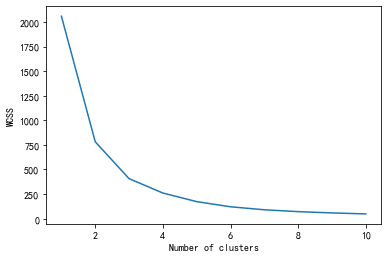

In [36]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [39]:
kmeans = cluster.KMeans(n_clusters=4, random_state = 42)
kmeans.fit(list(df["word_vector"]))

labels = kmeans.labels_
df['vlabels'] = labels

In [40]:
for label in df.vlabels.unique():
    print("Labels:",label)
    print(df[df['vlabels']==label].clean_job_title.value_counts()[:10])
    print("#"*20)

Labels: 2
Software Engineer     105
Research Fellow        88
Research Associate     66
Project Officer        42
Software Developer     34
Research Engineer      31
Research Assistant     30
Business Analyst       21
It Engineer            17
It Executive           15
Name: clean_job_title, dtype: int64
####################
Labels: 0
Senior Software Engineer      45
Data Analyst                  36
It Support Engineer           35
Data Engineer                 23
Data Scientist                16
Desktop Support Engineer      11
Data Processing Specialist     9
Senior Software Developer      9
Senior Research Engineer       8
It Support Executive           8
Name: clean_job_title, dtype: int64
####################
Labels: 1
Svp Platform Architect Group Consumer Banking                               3
Postdoctoral Research Fellow Computer Vision And Pattern Discovery Group    2
Contract Staff Risk Data Enabler Risk Management                            2
Research Fellow Computer Enginee

# Job Description

In [55]:
# from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teo-e\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\teo-e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [277]:
ALL_STOPWORDS = stopwords.words('english')
ALL_STOPWORDS += ["requirements", "knowledge", "work","experience", "skills", "job", "key", "responsibilities", "company", "shortlisted", "contract", "strong", "candidate", "regret", "contacted", "notified"]

In [283]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_job_description(job_description):
#     soup = BeautifulSoup(job_description) #certain text merged together due to HTML structure
#     job_description = soup.get_text() #remove all html tags
    job_description = job_description.lower()
    job_description = re.sub('<[^<]+?>', ' ', job_description) #remove all html tags
    job_description = re.sub(r'[^\w]', ' ', job_description) #remove that's not alphanumeric or underscore
    job_description = re.sub(r'\d', ' ', job_description) #remove number
    job_description = job_description.strip() #remove trailing and ending whitespace
    job_description = re.sub(r"\s\s+", " ", job_description) #remove multiple whitespace
    text_tokens = job_description.split(" ")
    job_description = [lemmatizer.lemmatize(word) for word in text_tokens if word not in ALL_STOPWORDS] #stop word removal
    return " ".join(job_description)

In [284]:
def splitDescriptionAndRequirement(df):
    jd = df["job_description"]
    sjd = jd.split(">Requirements")
    if len(sjd) == 1:
        sjd = jd.split(">Job Requirements")
    df['clean_job_desc'] = clean_job_description(jd)
    df['job_desc_only'] = clean_job_description(sjd[0])
    df['job_req_only'] = clean_job_description("".join(sjd[1:]))
    return df

In [285]:
df = df.apply(splitDescriptionAndRequirement, axis=1)

In [286]:
df[['clean_job_title','clean_job_desc','job_desc_only','job_req_only']][100:102]

,clean_job_title,clean_job_desc,job_desc_only,job_req_only
103,Software Technical Lead,comfortdelgro one largest land transport company world global workforce global shareholder base global outlook operate seven country global fleet vehicle comfortdelgro business include bus taxi rail car rental leasing automotive engineering service inspection testing service driving centre non emergency patient transport service insurance broking service outdoor advertising apart market leader singapore comfortdelgro significant overseas presence group operation currently extend united kingdom ireland australia vietnam malaysia new zealand across nine city china including beijing shanghai guangzhou shenyang chengdu role exciting phase digital transformation looking technical lead interact user understand business process gather user comprehensively drafting reviewing system specification adhering functional conducting comprehensive system testing ensure bug free program liaising communicating agreed outsourcers prepare review high level system design detailed design prepare project specific technical requirement spec perform coding testing implementation prepare review approved test plan test spec perform quality review implementation prepare conduct user training identify escalate project related issue project manager provide support project manager prepare project progress reporting resolve rollout issue providing swift resolution problem manage development software developed software partner resolve interface issue iot hardware software lead software team ensure reliability maintainability enterprise software solution lead team developer responsible application infrastructure framework development product tool support explore new technology evaluate relevance manage development proof concept prototype conceptualise usage new technology adapt enhance product value bachelor degree information technology computer science related field hand software development using java net javascript framework deployment cloud platform service implementing managing application public cloud aws azure gcp database nosql mysql mongodb etc familiar tdd pair programming clean code agile leading small team engineer ideal comfortable fast paced environment opportunity grow organisation least year vendor management vendor selection review ensure critical term condition included service level management excellent communication interpersonal skill demonstrated communicating value progress status project business minded technically savvy audience highly motivated able learn well quickly pick new technology best practice ability desire learn new technology apply new concept problem candidate,comfortdelgro one largest land transport company world global workforce global shareholder base global outlook operate seven country global fleet vehicle comfortdelgro business include bus taxi rail car rental leasing automotive engineering service inspection testing service driving centre non emergency patient transport service insurance broking service outdoor advertising apart market leader singapore comfortdelgro significant overseas presence group operation currently extend united kingdom ireland australia vietnam malaysia new zealand across nine city china including beijing shanghai guangzhou shenyang chengdu role exciting phase digital transformation looking technical lead interact user understand business process gather user comprehensively drafting reviewing system specification adhering functional conducting comprehensive system testing ensure bug free program liaising communicating agreed outsourcers prepare review high level system design detailed design prepare project specific technical requirement spec perform coding testing implementation prepare review approved test plan test spec perform quality review implementation prepare conduct user training identify escalate project related issue project manager provide support project manager prepare project progress repor

# Topic Modelling to check if words can be clustered

In [250]:
def tokeniseWord(word):
    return word_tokenize(word)

In [251]:
import gensim
import gensim.corpora as corpora# Create Dictionary

word_df = df["job_desc_only"].apply(tokeniseWord)

id2word = corpora.Dictionary(word_df)# Create Corpus
texts = word_df# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 5), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 3), (29, 2)]


In [252]:
from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"system" + 0.011*"application" + 0.011*"team" + 0.011*"support" + '
  '0.011*"business" + 0.010*"software" + 0.010*"data" + 0.008*"project" + '
  '0.007*"solution" + 0.007*"development"'),
 (1,
  '0.012*"software" + 0.010*"business" + 0.010*"system" + 0.009*"team" + '
  '0.008*"support" + 0.007*"design" + 0.007*"technology" + 0.007*"test" + '
  '0.006*"data" + 0.006*"management"'),
 (2,
  '0.014*"software" + 0.012*"data" + 0.011*"system" + 0.010*"project" + '
  '0.010*"team" + 0.009*"development" + 0.009*"technology" + '
  '0.008*"application" + 0.008*"amp" + 0.007*"support"'),
 (3,
  '0.019*"research" + 0.012*"data" + 0.009*"project" + 0.009*"amp" + '
  '0.008*"application" + 0.008*"software" + 0.008*"support" + 0.007*"team" + '
  '0.007*"business" + 0.006*"development"'),
 (4,
  '0.043*"data" + 0.011*"business" + 0.010*"software" + 0.010*"team" + '
  '0.007*"solution" + 0.007*"technology" + 0.007*"system" + 0.006*"management" '
  '+ 0.006*"project" + 0.005*"support"'),


In [302]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import os

# Visualize the topics
pyLDAvis.enable_notebook()

# if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)

# pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis_prepared

C:\Users\teo-e\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.031657 -0.004561       1        1  18.518637
0     -0.011890 -0.003625       2        1  15.167298
5      0.004340 -0.017144       3        1  12.035818
3     -0.008227  0.035148       4        1  10.079006
4      0.036229  0.001266       5        1   9.300596
9     -0.010942  0.008817       6        1   9.091513
8     -0.000441  0.012705       7        1   8.986781
2     -0.005019 -0.006061       8        1   7.609503
7     -0.024394 -0.014549       9        1   4.723166
1     -0.011313 -0.011997      10        1   4.487683, topic_info=                      Term         Freq        Total Category  logprob  \
235                   data  6012.000000  6012.000000  Default  30.0000   
135               software  2578.000000  2578.000000  Default  29.0000   
826               research  1398.000000  1398.000000  Default  28.0000   
49                  system  2956.000000  2956.000000  Default  27.0000   
14             development  1940.000000  1940.000000  Default  26.0000   
52                    test  1083.000000  1083.000000  Default  25.0000   
48                 support  2553.000000  2553.000000  Default  24.0000   
50                    team  2687.000000  2687.000000  Default  23.0000   
2              application  1942.000000  1942.000000  Default  22.0000   
10                  design  1703.000000  1703.000000  Default  21.0000   
51              technology  1393.000000  1393.000000  Default  20.0000   
75                computer   951.000000   951.000000  Default  19.0000   
261                provide  1192.000000  1192.000000  Default  18.0000   
230               business  2513.000000  2513.000000  Default  17.0000   
221                   user  1362.000000  1362.000000  Default  16.0000   
41                 project  2065.000000  2065.000000  Default  15.0000   
53                 testing   792.000000   792.000000  Default  14.0000   
91             engineering   776.000000   776.000000  Default  13.0000   
684               position   547.000000   547.000000  Default  12.0000   
176                 ensure  1150.000000  1150.000000  Default  11.0000   
433                service  1297.000000  1297.000000  Default  10.0000   
226                    amp  1727.000000  1727.000000  Default   9.0000   
40                 product  1052.000000  1052.000000  Default   8.0000   
255             management  1545.000000  1545.000000  Default   7.0000   
20                hardware   722.000000   722.000000  Default   6.0000   
29             maintenance   533.000000   533.000000  Default   5.0000   
123                problem   826.000000   826.000000  Default   4.0000   
290                network   635.000000   635.000000  Default   3.0000   
281               solution  1484.000000  1484.000000  Default   2.0000   
223                working   931.000000   931.000000  Default   1.0000   
5702                 codec     7.278798     8.409579   Topic1  -8.8930   
8561                  baan     4.709321     5.518886   Topic1  -9.3284   
8565                   tpd     3.189796     3.996887   Topic1  -9.7180   
9356               magento     4.554148     6.123758   Topic1  -9.3619   
6949                   cps     3.797694     5.142508   Topic1  -9.5435   
3272                   ath     2.792558     3.851777   Topic1  -9.8510   
5884               freight    24.554665    34.613013   Topic1  -7.6770   
6262                   mpa     7.718142    11.120448   Topic1  -8.8344   
6947                  cola     2.566787     3.730108   Topic1  -9.9353   
6956           refreshment     2.578365     3.748230   Topic1  -9.9308   
7285           gynaecology     2.549823     3.752457   Topic1  -9.9419   
6253                  ampd     9.046553    13.361515   Topic1  -8.6756   
7575               finergy     1.675950     2.475936   Topic1 -10.3616   
7687               florist     1.675944     2.475936 

In [253]:
def topicModelClassify(words):
    word_list = tokeniseWord(words)
    bow_word_list = id2word.doc2bow(word_list)
    return sorted(lda_model[bow_word_list], key=lambda tup: -1*tup[1])[0][0]

In [254]:
df["topic_labels"] = df["job_desc_only"].apply(topicModelClassify)

In [256]:
for i in df.topic_labels.unique():
    print("Topic :",i)
    print(df[df["topic_labels"] == i].clean_job_title.value_counts()[:10])
    print("#"*20)

Topic : 2
Software Engineer                                                20
Senior Software Engineer                                         12
Software Developer                                                3
It Engineer                                                       3
Svp Platform Architect Group Consumer Banking                     3
Research Fellow                                                   3
Senior Software Developer Artc                                    3
Sg Backend Engineer                                               2
Project Manager                                                   2
Avp Senior Associate Data Scientist Technology And Operations     2
Name: clean_job_title, dtype: int64
####################
Topic : 7
Software Engineer                  12
Research Fellow                     8
Project Officer                     5
Senior Software Engineer            5
Software Design Engineer            4
Intern Software Test Engineer       4
Research Associ

In [257]:
top_words = {}
for i in df.topic_labels.unique():
    top_words[i] = " ".join(df[df["topic_labels"] == i].clean_job_desc.tolist())

In [258]:
from wordcloud import WordCloud, ImageColorGenerator

def display_wordcloud(top_words, n_components, plt_per_row=4):
    plt.figure(figsize=[20,50])
    j = np.ceil(n_components/plt_per_row)
    for t in range(n_components):
        i=t+1
        plt.subplot(j, plt_per_row, i).set_title("Topic #" + str(t))
        plt.plot()
        plt.imshow(WordCloud().generate(top_words[t]))
        plt.axis("off")
    plt.show()

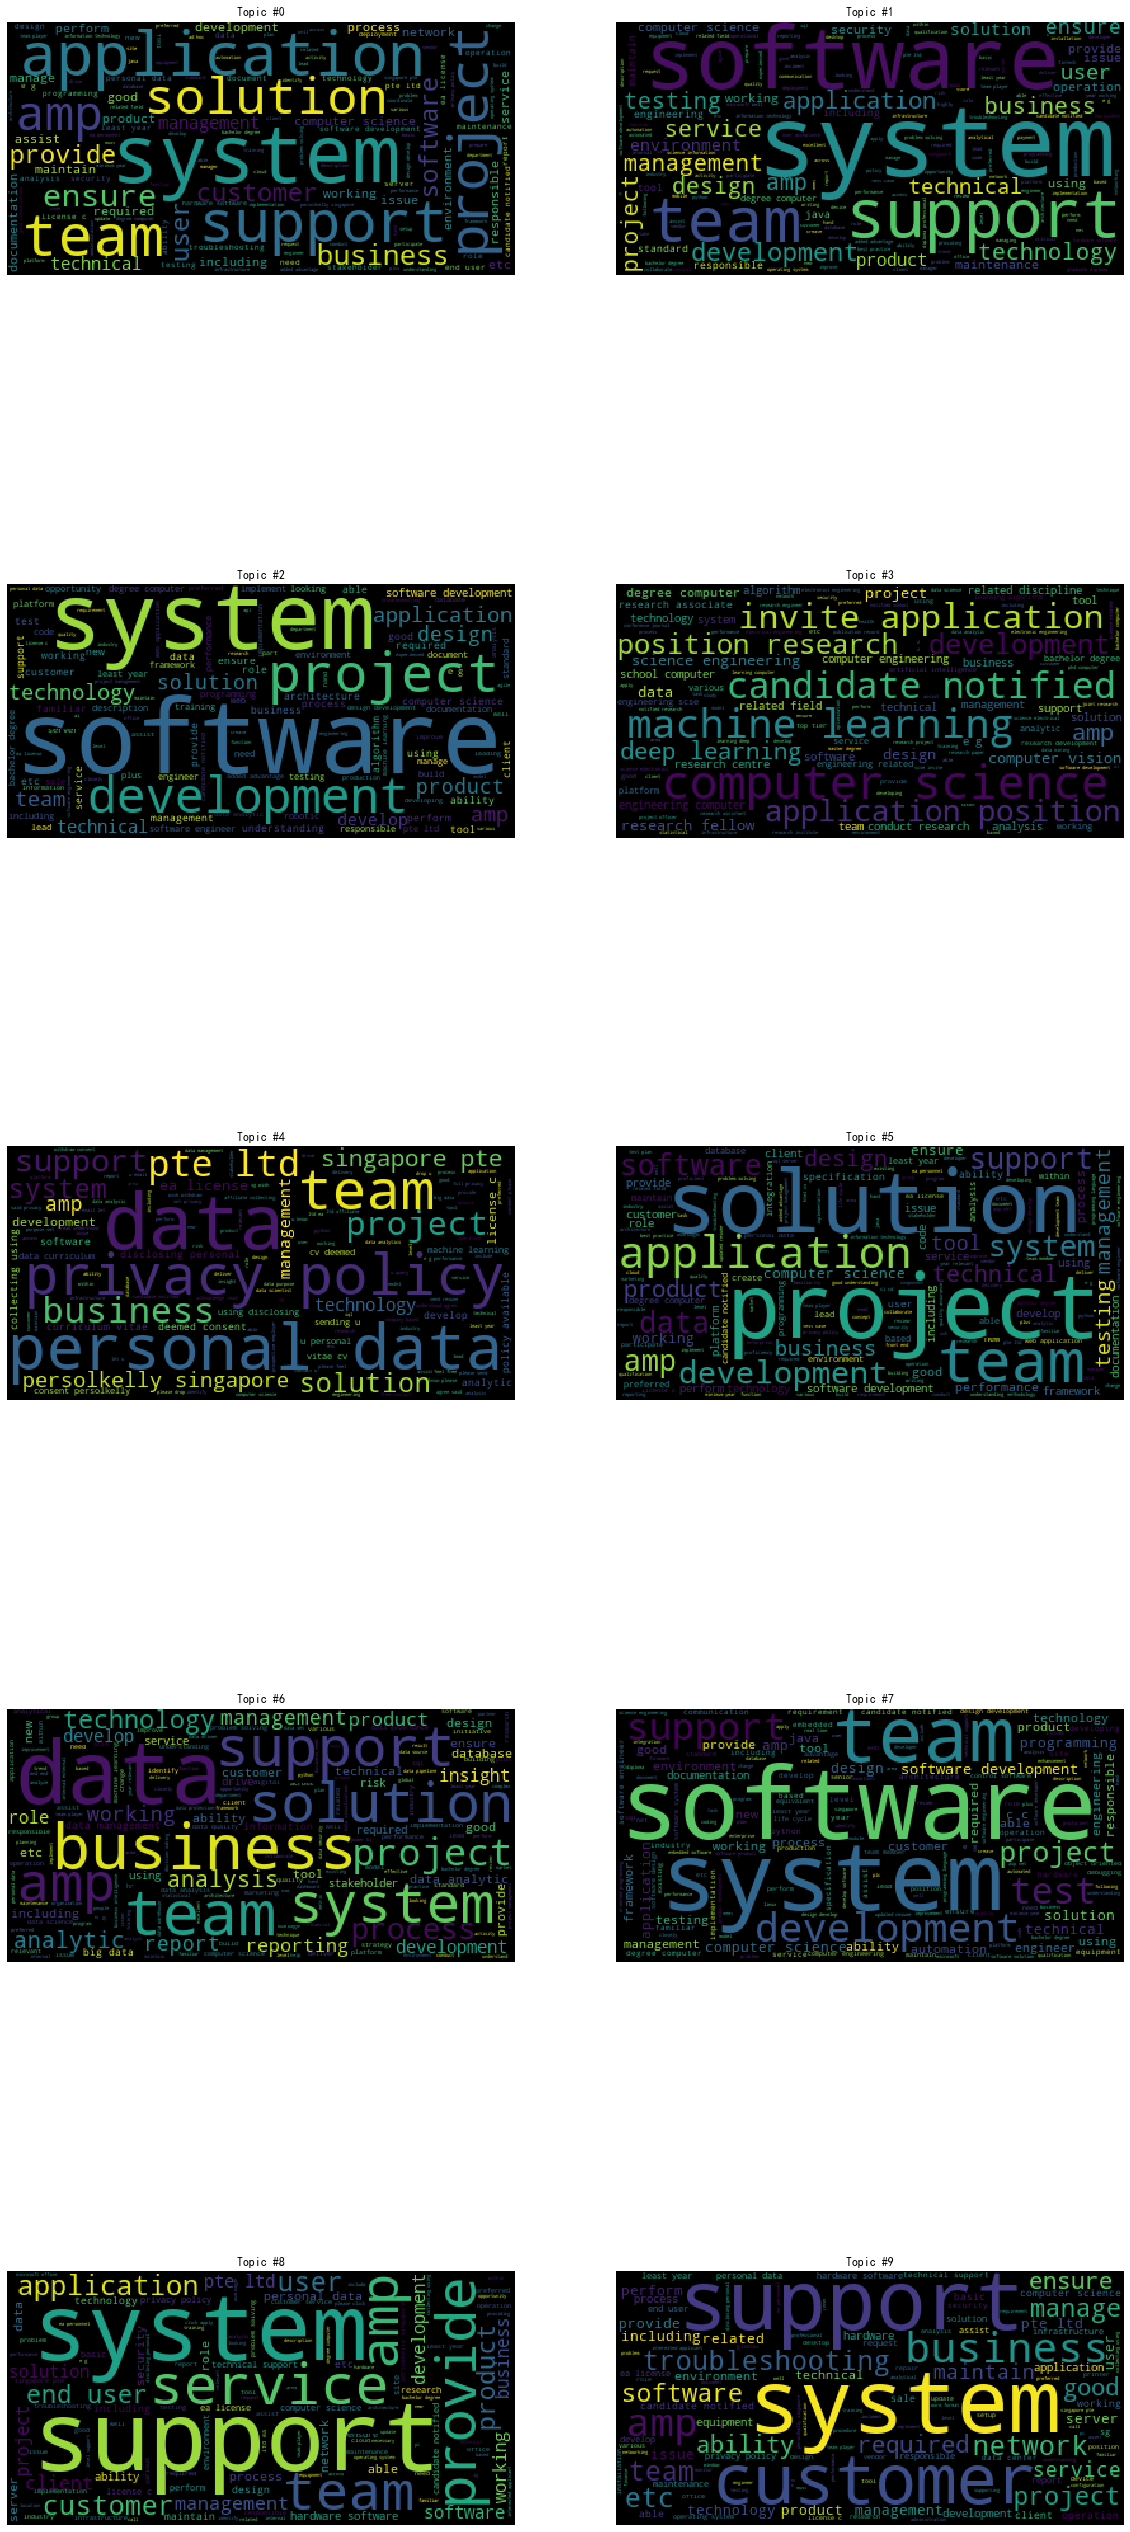

In [259]:
display_wordcloud(top_words, num_topics, 2)

In [260]:
word_freq = WordCloud().process_text(top_words[1])
dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

{'system': 139,
 'software': 104,
 'support': 102,
 'team': 94,
 'development': 83,
 'application': 78,
 'management': 72,
 'technology': 70,
 'testing': 69,
 'service': 68,
 'amp': 65,
 'business': 64,
 'design': 64,
 'project': 64,
 'user': 55,
 'technical': 54,
 'ensure': 54,
 'product': 51,
 'solution': 47,
 'environment': 45,
 'computer science': 43,
 'security': 42,
 'provide': 40,
 'using': 39,
 'working': 39,
 'operation': 39,
 'maintenance': 39,
 'issue': 36,
 'responsible': 34,
 'standard': 34,
 'maintain': 33,
 'tool': 33,
 'java': 32,
 'engineering': 32,
 'including': 32,
 'degree computer': 32,
 'information technology': 30,
 'develop': 29,
 'data': 29,
 'customer': 29,
 'perform': 29,
 'new': 28,
 'test': 28,
 'able': 28,
 'preferred': 27,
 'manage': 27,
 'good': 27,
 'relevant': 27,
 'etc': 26,
 'server': 25,
 'python': 25,
 'implementation': 25,
 'network': 25,
 'performance': 25,
 'client': 25,
 'bachelor degree': 25,
 'infrastructure': 24,
 'problem': 23,
 'team playe

# To-do: Map descriptions to job title, display in network map